In [ ]:
pip install --upgrade pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
pip install pythonbasictools

  Using cached PythonBasicTools-0.0.1a10-py3-none-any.whl (20 kB)


In [ ]:
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pennylane as qml

In [ ]:
dev = qml.device('default.qubit', wires=1)
U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(U, wires=0)
  return qml.expval(qml.Z(0))

In [ ]:
dev = qml.device('default.qubit', wires=3)
U = 1 / np.sqrt(2) * np.array([[1, 0, 0, 0], [0, 1, 1, 0],[0, 1, -1, 0],[1, 0, 0, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(U, wires=[0,1])
  qml.QubitUnitary(U, wires=[1,2])
  return [qml.expval(qml.PauliZ(i)) for i in range(3)]

In [ ]:
print(example_circuit())

[tensor(0., requires_grad=True), tensor(0., requires_grad=True), tensor(0., requires_grad=True)]


In [ ]:
print(range(2))

range(0, 2)


**Normal unitaries**

{'000': 12448, '001': 12529, '010': 12610, '011': 12401, '100': 12629, '101': 12446, '110': 12428, '111': 12509}


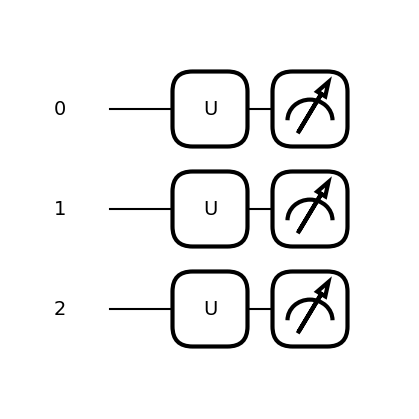

In [ ]:
dev = qml.device('default.qubit', wires=3, shots = 100000)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(H, wires=0)
  qml.QubitUnitary(H, wires=1)
  qml.QubitUnitary(H, wires=2)
  return qml.counts()
fig, ax = qml.draw_mpl(example_circuit)()
fig.show()

print(example_circuit())

{'000': tensor(12605, requires_grad=True), '001': tensor(12583, requires_grad=True), '010': tensor(12437, requires_grad=True), '011': tensor(12454, requires_grad=True), '100': tensor(12510, requires_grad=True), '101': tensor(12514, requires_grad=True), '110': tensor(12547, requires_grad=True), '111': tensor(12350, requires_grad=True)}


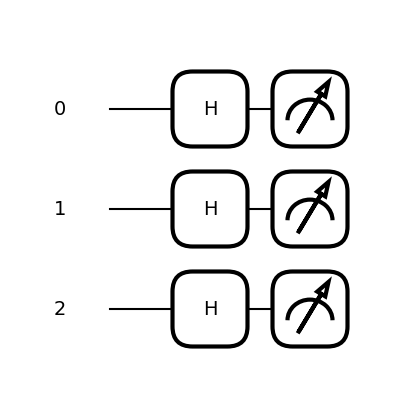

In [ ]:
dev = qml.device('default.qubit', wires=3, shots = 100000)
@qml.qnode(dev)
def example_circuit():
  qml.Hadamard(wires=0)
  qml.Hadamard(wires=1)
  qml.Hadamard(wires=2)
  return qml.counts()
fig, ax = qml.draw_mpl(example_circuit)()
fig.show()

print(example_circuit())

{'000': tensor(12533, requires_grad=True), '001': tensor(12500, requires_grad=True), '010': tensor(12562, requires_grad=True), '011': tensor(12461, requires_grad=True), '100': tensor(12566, requires_grad=True), '101': tensor(12579, requires_grad=True), '110': tensor(12456, requires_grad=True), '111': tensor(12343, requires_grad=True)}


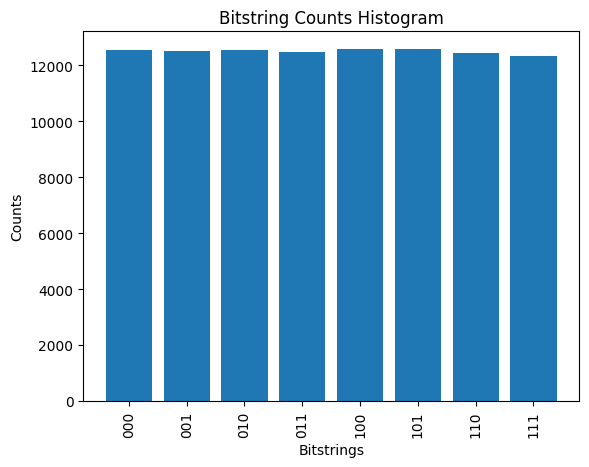

In [ ]:
# Execute the circuit
counts = example_circuit()
print(counts)

# Plot the counts as a histogram
fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
ax.set_xlabel('Bitstrings')
ax.set_ylabel('Counts')
ax.set_title('Bitstring Counts Histogram')
plt.xticks(rotation=90)
plt.show()

**2-qubit matchgate- U(H,H)-fHadamard**

{'000': 25055, '011': 25048, '101': 25118, '110': 24779}


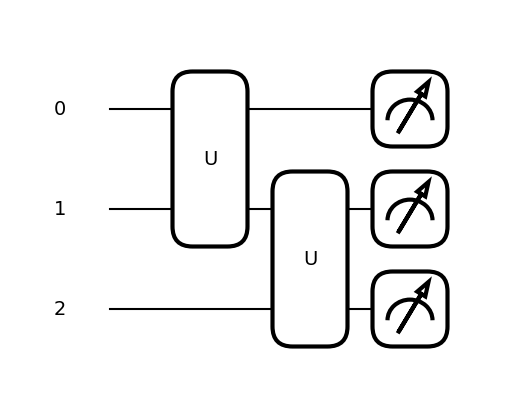

In [ ]:
dev = qml.device('default.qubit', wires=3, shots = 100000)
UHH = 1 / np.sqrt(2) * np.array([[1, 0, 0, 1], [0, 1, 1, 0],[0, 1, -1, 0],[1, 0, 0, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(UHH, wires=[0,1])
  qml.QubitUnitary(UHH, wires=[1,2])
  return qml.counts()
fig, ax = qml.draw_mpl(example_circuit)()
fig.show()

print(example_circuit())

{'000': 24754, '011': 25053, '101': 24878, '110': 25315}


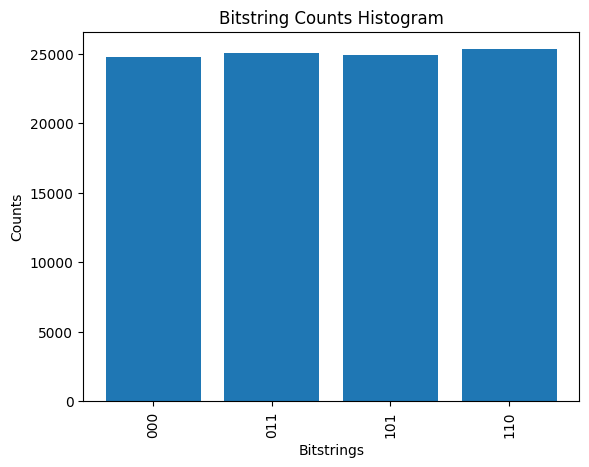

In [ ]:
# Execute the circuit
counts = example_circuit()
print(counts)

# Plot the counts as a histogram
fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
ax.set_xlabel('Bitstrings')
ax.set_ylabel('Counts')
ax.set_title('Bitstring Counts Histogram')
plt.xticks(rotation=90)
plt.show()

**2-qubit matchgates on 4 qubits**

{'0000': 12562, '0011': 12607, '0101': 12549, '0110': 12414, '1001': 12517, '1010': 12342, '1100': 12397, '1111': 12612}


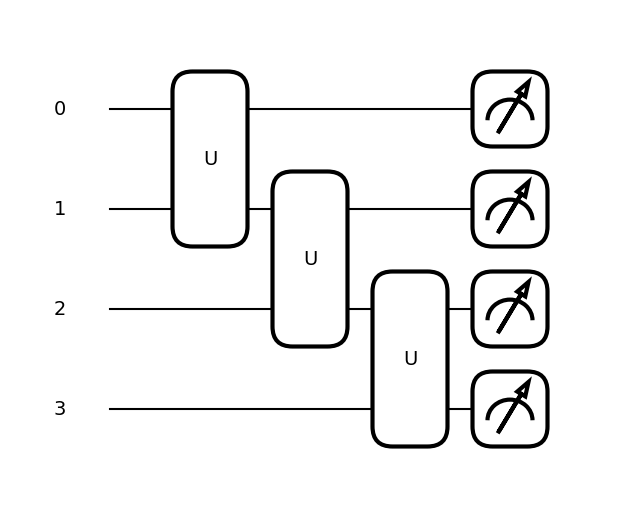

In [ ]:
dev = qml.device('default.qubit', wires=4, shots = 100000)
UHH = 1 / np.sqrt(2) * np.array([[1, 0, 0, 1], [0, 1, 1, 0],[0, 1, -1, 0],[1, 0, 0, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(UHH, wires=[0,1])
  qml.QubitUnitary(UHH, wires=[1,2])
  qml.QubitUnitary(UHH, wires=[2,3])
  return qml.counts()

fig, ax = qml.draw_mpl(example_circuit)()
fig.show()

print(example_circuit())

{'0000': 12506, '0011': 12407, '0101': 12495, '0110': 12447, '1001': 12641, '1010': 12640, '1100': 12512, '1111': 12352}


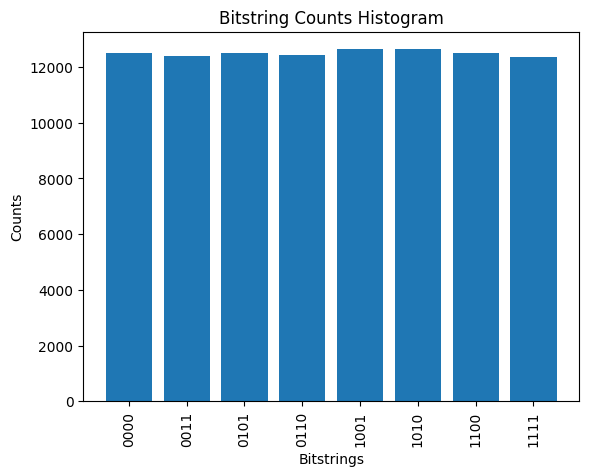

In [ ]:
# Execute the circuit
counts = example_circuit()
print(counts)

# Plot the counts as a histogram
fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
ax.set_xlabel('Bitstrings')
ax.set_ylabel('Counts')
ax.set_title('Bitstring Counts Histogram')
plt.xticks(rotation=90)
plt.show()

{'0000': 110, '0011': 128, '0101': 117, '0110': 124, '1001': 135, '1010': 116, '1100': 130, '1111': 140}


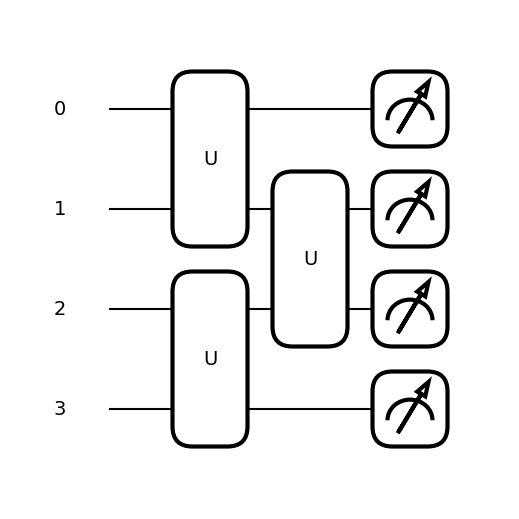

In [ ]:
dev = qml.device('default.qubit', wires=4, shots = 1000)
UHH = 1 / np.sqrt(2) * np.array([[1, 0, 0, 1], [0, 1, 1, 0],[0, 1, -1, 0],[1, 0, 0, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(UHH, wires=[0,1])
  qml.QubitUnitary(UHH, wires=[2,3])
  qml.QubitUnitary(UHH, wires=[1,2])
  return qml.counts()

fig, ax = qml.draw_mpl(example_circuit)()
fig.show()

print(example_circuit())

**Circuit with fSWAP**

In [ ]:
print(UHH)

[[ 0.70710678  0.          0.          0.70710678]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.          0.         -0.70710678]]


In [ ]:
UZX = np.array([[1, 0, 0, 0], [0, 0, 1, 0],[0, 1, 0, 0],[0, 0, 0, -1]]) #fSWAP gate

In [ ]:
print(UZX)

[[ 1  0  0  0]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [ 0  0  0 -1]]


{'0000': 24824, '0101': 24990, '1001': 25225, '1100': 24961}


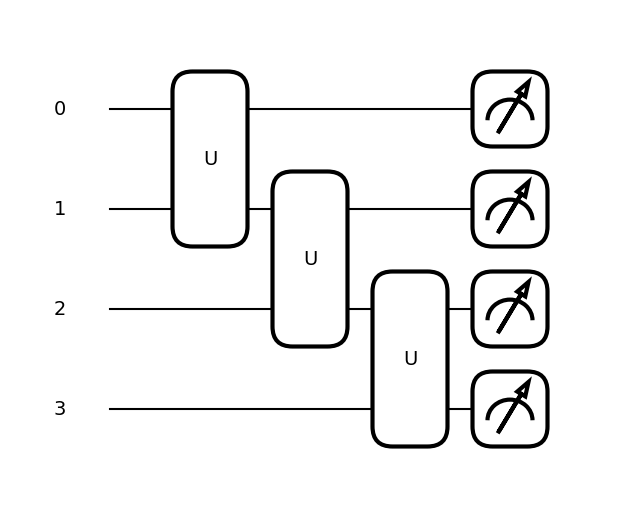

In [ ]:
dev = qml.device('default.qubit', wires=4, shots = 100000)
UHH = 1 / np.sqrt(2) * np.array([[1, 0, 0, 1], [0, 1, 1, 0],[0, 1, -1, 0],[1, 0, 0, -1]])
UZX = np.array([[1, 0, 0, 0], [0, 0, 1, 0],[0, 1, 0, 0],[0, 0, 0, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(UHH, wires=[0,1])
  qml.QubitUnitary(UHH, wires=[1,2])
  qml.QubitUnitary(UZX, wires=[2,3])
  return qml.counts()

fig, ax = qml.draw_mpl(example_circuit)()
fig.show()

print(example_circuit())

In [ ]:
# fig, ax = qml.draw_mpl(example_circuit, expansion_strategy="device")()

# # Modify the labels
# for text in ax.texts:
#     if text.get_text() == "U":
#         text.set_text("U(H,H)")

# fig.show()

{'0000': 25135, '0101': 24933, '1001': 24913, '1100': 25019}


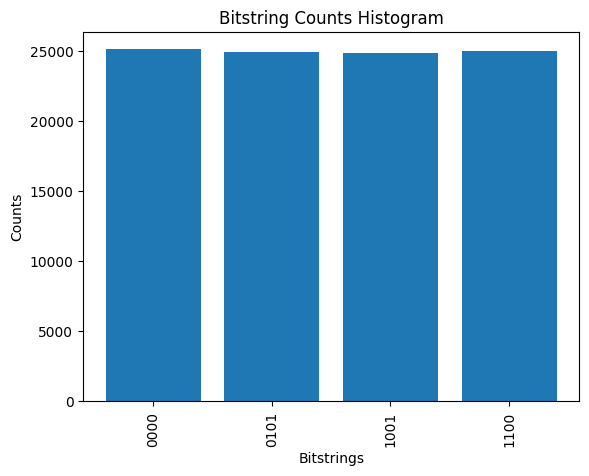

In [ ]:
# Execute the circuit
counts = example_circuit()
print(counts)

# Plot the counts as a histogram
fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
ax.set_xlabel('Bitstrings')
ax.set_ylabel('Counts')
ax.set_title('Bitstring Counts Histogram')
plt.xticks(rotation=90)
plt.show()